# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import itertools 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

# EDA

In [2]:
df_merge = pd.read_csv('merge_data.csv')
df_merge = df_merge.drop('Unnamed: 0', 1)
df_merge.head()

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,St. Martin's,Kristin Hannah,125016561X,2018-06-09,THE GREAT ALONE,16,3,151,243,48,363073,778639,36575,4.34
1,Ballantine,Jodi Picoult,034554496X,2017-02-12,SMALL GREAT THINGS,16,3,104,172,35,260815,533873,25170,4.34
2,Grand Central,Nicholas Sparks,1455520691,2017-02-05,TWO BY TWO,16,3,2015,8889,353,66630,163159,5816,3.92
3,Harper,Harper Lee,0062409875,2016-07-10,GO SET A WATCHMAN,16,4,54,96,17,229380,575055,29495,3.31
4,Scribner,Stephen King,1501175467,2017-12-10,IT,15,1,1333,2982,190,789789,1398689,25068,4.24


In [3]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publisher                1215 non-null   object 
 1   author                   1215 non-null   object 
 2   isbn                     1215 non-null   object 
 3   date                     1215 non-null   object 
 4   title                    1215 non-null   object 
 5   weeks_on_list            1215 non-null   int64  
 6   no_of_words_title        1215 non-null   int64  
 7   ratings_count            1215 non-null   int64  
 8   reviews_count            1215 non-null   int64  
 9   text_reviews_count       1215 non-null   int64  
 10  work_ratings_count       1215 non-null   int64  
 11  work_reviews_count       1215 non-null   int64  
 12  work_text_reviews_count  1215 non-null   int64  
 13  average_rating           1215 non-null   float64
dtypes: float64(1), int64(8),

### Explore the relationships between variables

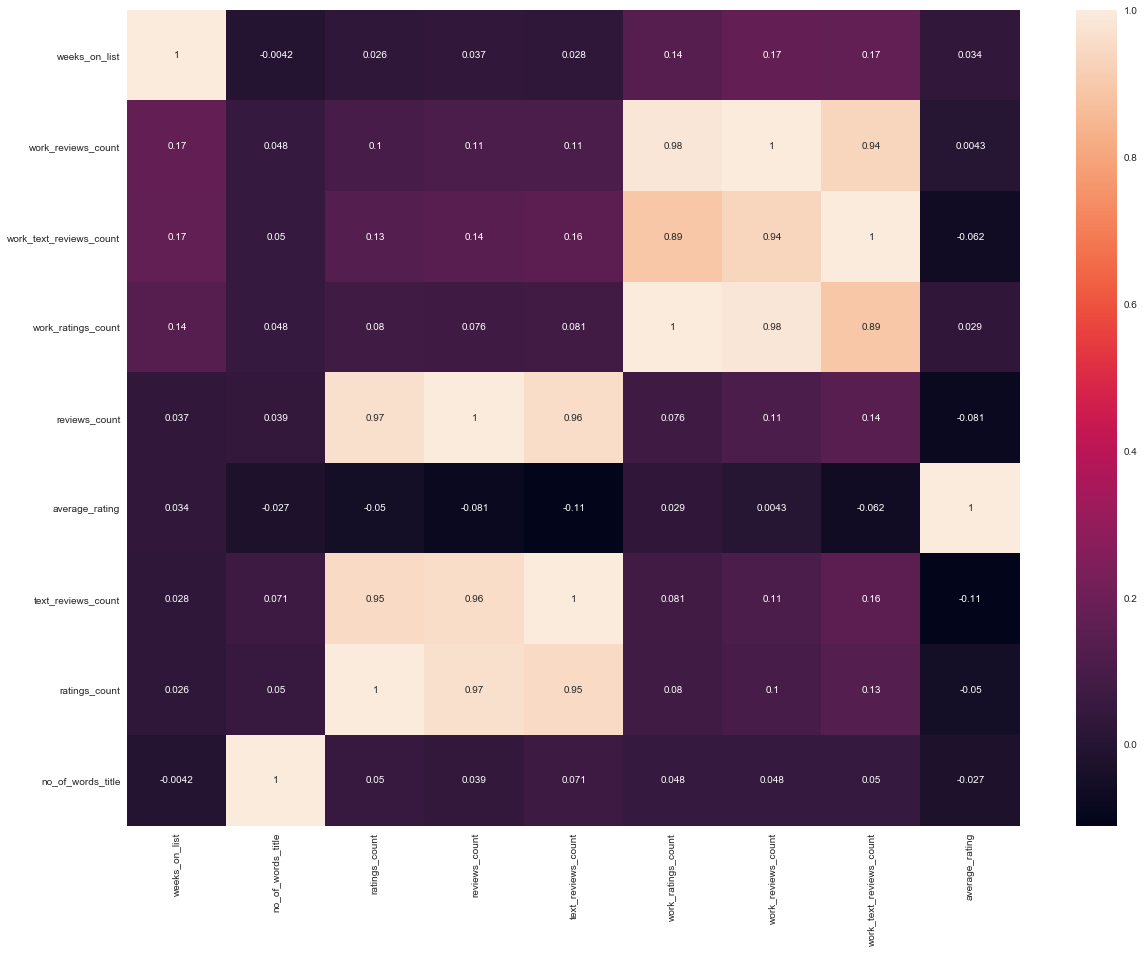

In [4]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_merge.corr().sort_values('weeks_on_list', ascending=False), annot=True)
plt.show()

In [5]:
# Calculate correlation of each feature to 'weeks_on_list' and sort in descending order
corr = df_merge.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Target', 'level_1':'Features', 0:'Correlation_Values'})
corr = corr.loc[corr['Target'] == 'weeks_on_list']
corr.sort_values(by = 'Correlation_Values', ascending = False)

,Target,Features,Correlation_Values
0,weeks_on_list,weeks_on_list,1.000000
6,weeks_on_list,work_reviews_count,0.172599
7,weeks_on_list,work_text_reviews_count,0.170374
5,weeks_on_list,work_ratings_count,0.140125
3,weeks_on_list,reviews_count,0.036516
8,weeks_on_list,average_rating,0.034154
4,weeks_on_list,text_reviews_count,0.028046
2,weeks_on_list,ratings_count,0.026009
1,weeks_on_list,no_of_words_title,-0.004164


### Distribution of Review and Rating Counts

(array([   343.99189406,   3095.92704658,  15479.63523289,  60886.56524937,
        109733.41420649, 112829.34125307,  73270.27343568,  30271.28667765,
          6535.84598722,    343.99189406]),
 array([-3.86315245, -3.11610233, -2.36905221, -1.62200209, -0.87495197,
        -0.12790185,  0.61914827,  1.36619839,  2.11324851,  2.86029863,
         3.60734875]),
 <a list of 10 Patch objects>)

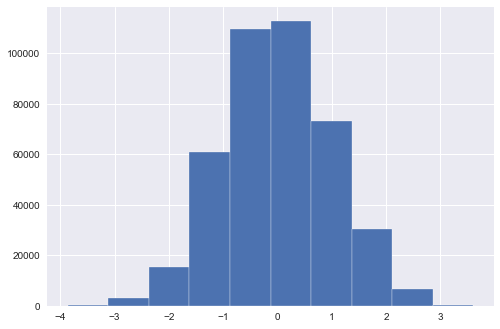

In [6]:
# Distribution of work_text_reviews_count
df = pd.DataFrame({'work_text_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_text_reviews_count, weights=df.weeks_on_list)

(array([  190.47367535,   380.94735069,  3618.9998316 ,  9047.499579  ,
        23237.78839239, 30856.73540628, 27999.63027607, 14475.9993264 ,
         3618.9998316 ,   857.13153906]),
 array([-3.97005494, -3.26909716, -2.56813939, -1.86718161, -1.16622384,
        -0.46526606,  0.23569172,  0.93664949,  1.63760727,  2.33856504,
         3.03952282]),
 <a list of 10 Patch objects>)

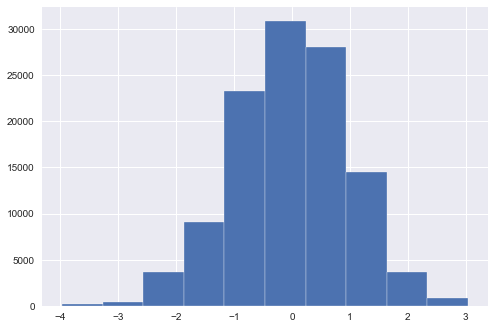

In [7]:
# Distribution of work_reviews_count
df = pd.DataFrame({'work_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_reviews_count, weights=df.weeks_on_list)

(array([ 10549.66046754,  39854.27287736, 130112.47909963, 247330.92873893,
        312973.26053694, 316489.81402612, 220370.68532189,  92602.57521505,
         24615.87442425,  11721.84496393]),
 array([-3.15578728, -2.51567584, -1.87556441, -1.23545297, -0.59534153,
         0.04476991,  0.68488134,  1.32499278,  1.96510422,  2.60521565,
         3.24532709]),
 <a list of 10 Patch objects>)

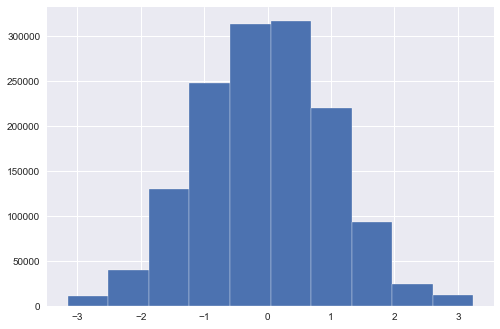

In [8]:
# Distribution of work_ratings_count
df = pd.DataFrame({'work_ratings_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_ratings_count, weights=df.weeks_on_list)

(array([  1508.40968745,  16592.50656194,  67878.43593521, 166679.27046312,
        236820.32092951, 245870.7790542 , 111622.31687123,  46760.70031092,
          9050.45812469,   2262.61453117]),
 array([-3.54540132, -2.81963131, -2.0938613 , -1.36809128, -0.64232127,
         0.08344874,  0.80921876,  1.53498877,  2.26075878,  2.9865288 ,
         3.71229881]),
 <a list of 10 Patch objects>)

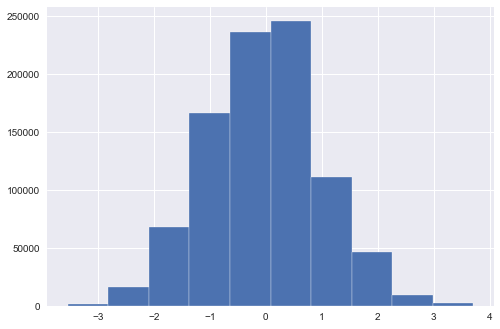

In [9]:
# Distribution of text_reviews_count
df = pd.DataFrame({'text_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.text_reviews_count, weights=df.weeks_on_list)

(array([  1054.88639615,   7384.20477308,  42195.45584619, 123421.7083501 ,
        243678.75751174, 346002.73793874, 294313.30452716, 149793.86825397,
         47469.88782696,  10548.86396155]),
 array([-3.91968252, -3.21616436, -2.51264619, -1.80912803, -1.10560987,
        -0.4020917 ,  0.30142646,  1.00494463,  1.70846279,  2.41198096,
         3.11549912]),
 <a list of 10 Patch objects>)

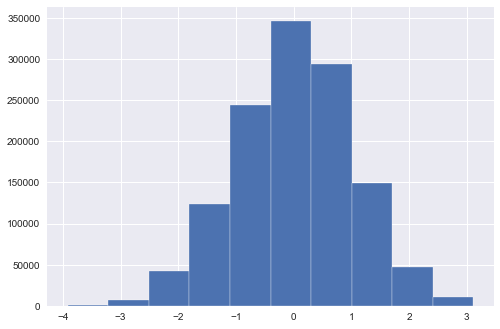

In [10]:
# Distribution of ratings_count
df = pd.DataFrame({'ratings_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.ratings_count, weights=df.weeks_on_list)

(array([  458.0814001 ,  2977.52910065,  9161.62800202, 21186.26475466,
        33096.38115728, 32294.7387071 , 23018.59035506, 10650.39255234,
         3321.09015073,  1259.72385028]),
 array([-3.17323057, -2.54333741, -1.91344424, -1.28355108, -0.65365791,
        -0.02376475,  0.60612842,  1.23602158,  1.86591474,  2.49580791,
         3.12570107]),
 <a list of 10 Patch objects>)

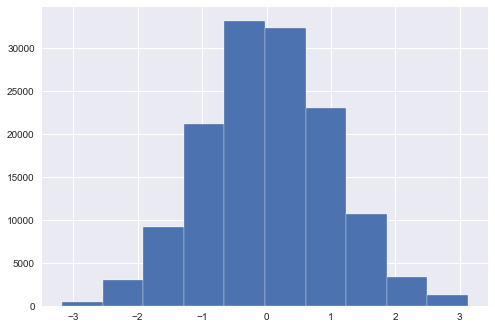

In [11]:
# Distribution of reviews_count
df = pd.DataFrame({'reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.reviews_count, weights=df.weeks_on_list)

### Scatter plots for Average Rating and Number of Words in Title

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F84B93548>,
      dtype=object)

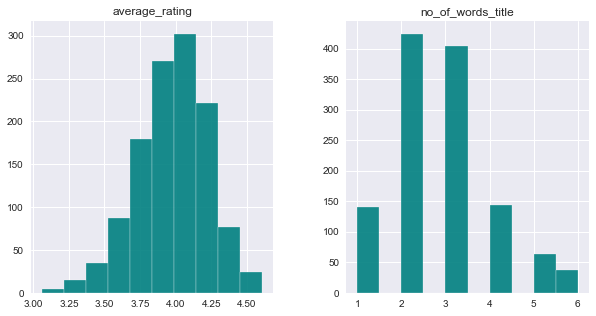

In [70]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
df_merge[['average_rating','no_of_words_title']].hist(bins=10, color='teal', alpha=0.9, ax=ax)

### Top 20 Publishers with the most best selling books

In [14]:
publisher_list = df_merge['publisher'].to_list()

In [15]:
publisher_list

["St. Martin's",
 'Ballantine',
 'Grand Central',
 'Harper',
 'Scribner',
 'Grand Central',
 'Grand Central',
 'Delacorte',
 'Doubleday',
 'Grand Central',
 'Riverhead',
 'Sarah Crichton/Farrar, Straus & Giroux',
 'Delacorte Press',
 'Grand Central',
 'Grand Central',
 'Delacorte',
 'Berkley',
 'Grand Central',
 'Little, Brown',
 'Grand Central',
 'Putnam',
 'Knopf',
 'Knopf Doubleday',
 'Vintage',
 'Viking',
 'Flatiron',
 'Grand Central',
 'Delacorte',
 'Grand Central',
 'Grand Central',
 'Little, Brown',
 "St. Martin's",
 'Algonquin',
 'Grand Central',
 'Bantam',
 'Random House',
 'Picador',
 'Scribner',
 'Delacorte',
 'Broadway',
 'Little, Brown & Company',
 'Random House Publishing',
 'Grand Central',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown',
 'Scribner',
 'Scribner',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown & Company',
 'Putnam',
 'Little, Brown',
 'Delacorte',
 'Putnam',
 'Simon & Schuster',
 'Little, Brown',
 'Little, Br

In [16]:
# Convert any of the iterable to sequence of iterable publishers with dintinct publishers
unique_publishers = set(publisher_list)

In [17]:
# Count the number of books for each publisher
num_publisher = {}
for publisher in unique_publishers:
    num_publisher[publisher] = publisher_list.count(publisher)
    
num_publisher

{'Atlantic Monthly Press': 1,
 'Random House': 41,
 'Picador': 1,
 'HarperCollins': 21,
 'Carina Press': 1,
 'Simon & Schuster': 67,
 'Morrow/HarperCollins': 33,
 'HarperCollins Publishers': 30,
 'Riverhead': 4,
 'Marian Wood/Putnam': 3,
 'Broadway': 4,
 'Harper Perennial': 2,
 'Laurelin Paige': 1,
 'Delacorte': 36,
 'Mira': 20,
 'Touchstone': 11,
 'Zebra/Kensington': 1,
 'Crown Archetype': 1,
 'Penguin Group': 19,
 'Atria': 21,
 'Pocket Star': 1,
 'Hyperion': 2,
 'Emily Bestler/Atria': 6,
 'Nan A. Talese/Doubleday': 1,
 'Harper Perennial/HarperCollins': 1,
 'Ballatine': 1,
 'Mulholland/Little, Brown': 3,
 'Crown Publishing': 1,
 "Knopf/McSweeney's": 1,
 'Tom Doherty': 2,
 'Tor/Tom Doherty': 4,
 'Delacorte Press': 1,
 'Liliana Hart': 1,
 'Ballantine': 32,
 'Sapphire Star Publishing': 1,
 'Kathleen Brooks': 1,
 'Kingswell': 1,
 'Howard': 1,
 'Sarah Crichton/Farrar, Straus & Giroux': 1,
 'Witness Impulse': 4,
 'Zebra': 12,
 'Holt': 2,
 'Bethany House': 1,
 'Ecco/HarperCollins': 2,
 'Book

In [18]:
# Sort the publisher list from the highest to the lowest number of books
num_publisher = {k: v for k, v in sorted(num_publisher.items(), key=lambda item: item[1], 
                                         reverse=True)}

In [19]:
# Review the list
num_publisher

{'Simon & Schuster': 67,
 'Little, Brown': 65,
 'Grand Central': 59,
 "St. Martin's": 54,
 'Putnam': 46,
 'Random House': 41,
 'Random House Publishing': 40,
 'Harlequin': 38,
 'Delacorte': 36,
 'Morrow/HarperCollins': 33,
 'Ballantine': 32,
 'HarperCollins Publishers': 30,
 'Avon': 29,
 'Morrow': 25,
 'Bantam': 25,
 'Harper': 22,
 'HarperCollins': 21,
 'Atria': 21,
 'Mira': 20,
 'HQN': 20,
 'Penguin Group': 19,
 'Grand Central Publishing': 19,
 "St. Martin's Press": 19,
 'Berkley': 19,
 'Scribner': 18,
 'Knopf': 18,
 'Del Rey': 15,
 'Little, Brown & Company': 14,
 'Minotaur': 13,
 'Zebra': 12,
 'Touchstone': 11,
 'Gallery': 11,
 'Doubleday': 10,
 'Knopf Doubleday': 10,
 'Gallery Books': 9,
 'Dutton': 9,
 'Knopf Doubleday Publishing': 9,
 'Kensington': 8,
 'Ace': 7,
 'Viking': 7,
 'Emily Bestler/Atria': 6,
 'BookShots': 6,
 'Harlequin Mira': 6,
 'Howard Books': 5,
 'Forever': 5,
 'Orbit': 5,
 "St. Martin's Griffin": 5,
 'Farrar, Straus & Giroux': 5,
 'Harper/HarperCollins': 5,
 'Vintag

In [20]:
# Make another list with Top 20 publishers with the higest number of best selling books
publisher_20 = dict(itertools.islice(num_publisher.items(), 20))

In [21]:
publisher_20

{'Simon & Schuster': 67,
 'Little, Brown': 65,
 'Grand Central': 59,
 "St. Martin's": 54,
 'Putnam': 46,
 'Random House': 41,
 'Random House Publishing': 40,
 'Harlequin': 38,
 'Delacorte': 36,
 'Morrow/HarperCollins': 33,
 'Ballantine': 32,
 'HarperCollins Publishers': 30,
 'Avon': 29,
 'Morrow': 25,
 'Bantam': 25,
 'Harper': 22,
 'HarperCollins': 21,
 'Atria': 21,
 'Mira': 20,
 'HQN': 20}

In [22]:
# Make 2 lists for name of publishers and number of books
publishers = []
counts = []

for publisher, count in publisher_20.items():
    publishers.append(publisher)
    counts.append(count)

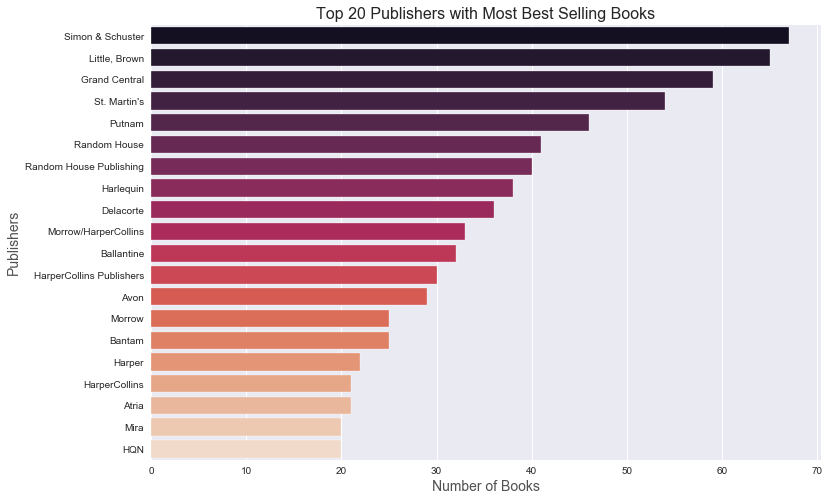

In [23]:
# Graph to see the trend
plt.figure(figsize=(12, 8))
gr1 = sns.barplot(x=counts, y=publishers,
                  ci=None, palette='rocket')
gr1.set_xlabel('Number of Books', fontsize=14, alpha=0.8)
gr1.set_ylabel('Publishers', fontsize=14, alpha=0.8)
gr1.set_title('Top 20 Publishers with Most Best Selling Books', fontsize=16)
plt.show()

### Top 20 Authors with the most best selling books

In [24]:
author_list = df_merge['author'].to_list()

In [25]:
# Convert any of the iterable to sequence of iterable authors with dintinct authors
unique_authors = set(author_list)

In [26]:
# Count the number of books for each author
num_author = {}
for author in unique_authors:
    num_author[author] = author_list.count(author)
    
num_author

{'Meg Waite Clayton': 1,
 'Linda Castillo': 1,
 'Curtis Sittenfeld': 1,
 'Stephenie Meyer': 2,
 'Noah Hawley': 1,
 'Nora Roberts': 12,
 'Donna Leon': 5,
 'James Patterson with Michael Ledwidge': 1,
 'David Nicholls': 1,
 'Beth Kerry': 1,
 'Chuck Wendig': 3,
 'Meg Wolitzer': 1,
 'James Patterson and Jeffrey J Keyes': 1,
 'Wiley Cash': 1,
 'Laurelin Paige': 1,
 'James Wesley, Rawles': 1,
 'Brad Meltzer and Tod Goldberg': 1,
 'Amanda Quick': 2,
 'Kate Morton': 2,
 'Mary Kay Andrews': 3,
 'Jonathan Kellerman and Jesse Kellerman': 1,
 'Anita Shreve': 1,
 'Ian McGuire': 1,
 'Clive Cussler and Graham Brown': 4,
 'Clive Cussler and Dirk Cussler': 1,
 'Katy Evans': 3,
 'Kristan Higgins': 2,
 'R A Salvatore': 1,
 'Jodi Picoult': 6,
 'Susan Elizabeth Phillips': 2,
 'Dave Eggers': 1,
 'Jay Crownover': 3,
 'Alan Dean Foster': 1,
 'G A Aiken': 1,
 'Marie Force': 8,
 'Don Winslow': 1,
 'Charlaine Harris': 2,
 'Michael Ponsor': 1,
 'Christine Feehan': 3,
 'Clive Cussler and Robin Burcell': 2,
 'Philip

In [27]:
# Sort the author list from the highest to the lowest number of books
num_author = {k: v for k, v in sorted(num_author.items(), key=lambda item: item[1], 
                                         reverse=True)}

In [28]:
# Review the list
num_author

{'Danielle Steel': 25,
 'Susan Mallery': 20,
 'David Baldacci': 18,
 'Ron Carr': 17,
 'Janet Evanovich': 13,
 'J A Jance': 13,
 'Nora Roberts': 12,
 'Debbie Macomber': 12,
 'Lee Child': 12,
 'Michael Connelly': 12,
 'Lisa Scottoline': 11,
 'James Patterson and Maxine Paetro': 11,
 'Karen Kingsbury': 11,
 'Linda Lael Miller': 11,
 'Iris Johansen': 11,
 'Stephen King': 10,
 'Dean Koontz': 10,
 'Jill Shalvis': 10,
 'Sandra Brown': 10,
 'Douglas Preston and Lincoln Child': 10,
 'Fern Michaels': 9,
 'John Grisham': 9,
 'Christina Lauren': 9,
 'Elin Hilderbrand': 9,
 'Lynsay Sands': 9,
 'Mary Higgins Clark': 9,
 'Marie Force': 8,
 'Dorothea Benton Frank': 8,
 'Richard Paul Evans': 8,
 'Philippa Gregory': 8,
 'James Patterson': 8,
 'Maya Banks': 8,
 'Kristin Hannah': 8,
 'James Patterson and Michael Ledwidge': 8,
 'Kresley Cole': 8,
 'Nicholas Sparks': 7,
 'Tess Gerritsen': 7,
 'Steve Berry': 7,
 'Lisa Jackson': 7,
 'Jodi Picoult': 6,
 'George R R Martin': 6,
 'Jeffery Deaver': 6,
 'Louise Pe

In [29]:
# Make another list with Top 20 authors with the higest number of best selling books
author_20 = dict(itertools.islice(num_author.items(), 20))

In [30]:
author_20

{'Danielle Steel': 25,
 'Susan Mallery': 20,
 'David Baldacci': 18,
 'Ron Carr': 17,
 'Janet Evanovich': 13,
 'J A Jance': 13,
 'Nora Roberts': 12,
 'Debbie Macomber': 12,
 'Lee Child': 12,
 'Michael Connelly': 12,
 'Lisa Scottoline': 11,
 'James Patterson and Maxine Paetro': 11,
 'Karen Kingsbury': 11,
 'Linda Lael Miller': 11,
 'Iris Johansen': 11,
 'Stephen King': 10,
 'Dean Koontz': 10,
 'Jill Shalvis': 10,
 'Sandra Brown': 10,
 'Douglas Preston and Lincoln Child': 10}

In [31]:
# Make 2 lists for name of publishers and number of books
authors = []
counts = []

for author, count in author_20.items():
    authors.append(author)
    counts.append(count)

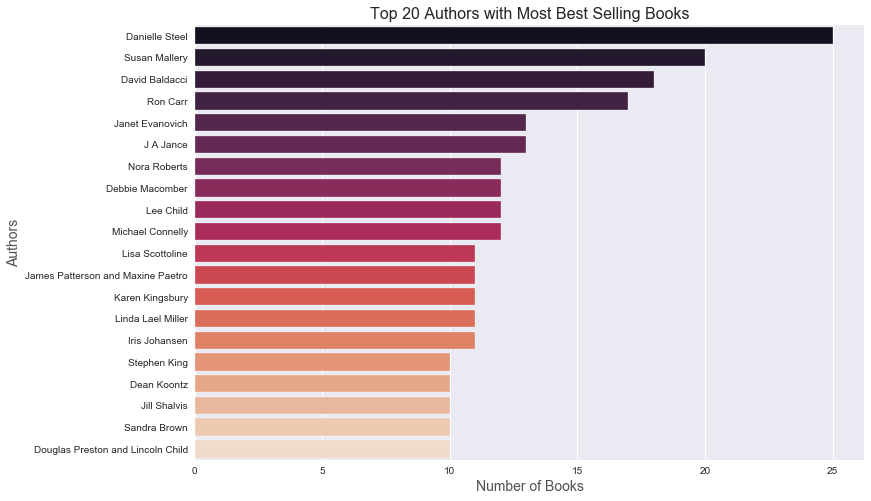

In [32]:
# Graph to see the trend
plt.figure(figsize=(12, 8))
gr2 = sns.barplot(x=counts, y=authors,
                  ci=None, palette='rocket')
gr2.set_xlabel('Number of Books', fontsize=14, alpha=0.8)
gr2.set_ylabel('Authors', fontsize=14, alpha=0.8)
gr2.set_title('Top 20 Authors with Most Best Selling Books', fontsize=16)
plt.show()

### Best Sellers Trend by Years

In [33]:
# Change the format of 'date' column
df_merge['date'] = pd.to_datetime(df_merge['date'])
print(df_merge['date'].dtype)

datetime64[ns]


In [34]:
# Extract the year from 'date' column and put it in a new column 'year'
df_merge['year'] = pd.DatetimeIndex(df_merge['date']).year
df_merge.head()

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating,year
0,St. Martin's,Kristin Hannah,125016561X,2018-06-09,THE GREAT ALONE,16,3,151,243,48,363073,778639,36575,4.34,2018
1,Ballantine,Jodi Picoult,034554496X,2017-02-12,SMALL GREAT THINGS,16,3,104,172,35,260815,533873,25170,4.34,2017
2,Grand Central,Nicholas Sparks,1455520691,2017-02-05,TWO BY TWO,16,3,2015,8889,353,66630,163159,5816,3.92,2017
3,Harper,Harper Lee,0062409875,2016-07-10,GO SET A WATCHMAN,16,4,54,96,17,229380,575055,29495,3.31,2016
4,Scribner,Stephen King,1501175467,2017-12-10,IT,15,1,1333,2982,190,789789,1398689,25068,4.24,2017


In [35]:
yr_list = df_merge['year'].to_list()

In [36]:
# Convert any of the iterable to sequence of iterable years with dintinct years
unique_yrs = set(yr_list)

In [37]:
# Count the number of books for each year
num_yr = {}
for yr in unique_yrs:
    num_yr[yr] = yr_list.count(yr)

In [38]:
# Sort the year list in order of 2011 to 2018
num_yr = dict(sorted(list(num_yr.items())))
num_yr

{2011: 143,
 2012: 137,
 2013: 131,
 2014: 142,
 2015: 172,
 2016: 248,
 2017: 169,
 2018: 73}

In [39]:
# Make 2 lists for years and number of books
yrs = []
counts = []

for yr, count in num_yr.items():
    yrs.append(yr)
    counts.append(count)

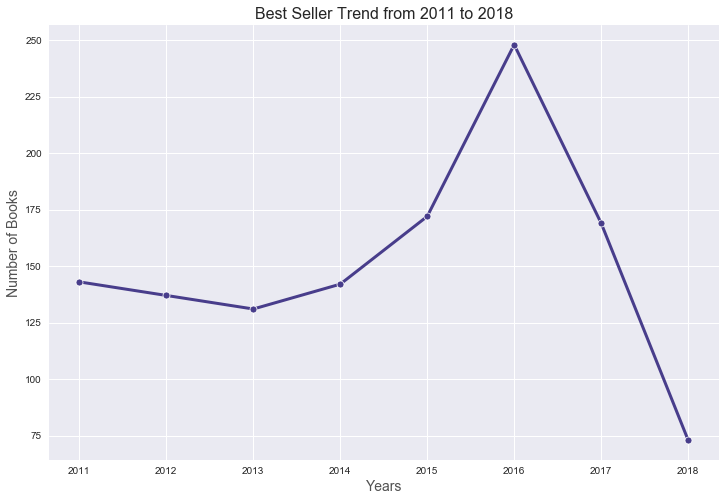

In [40]:
# Graph to see the trend
plt.figure(figsize=(12, 8))
gr3 = sns.lineplot(yrs, counts, ci=None, marker='o', color='darkslateblue', linewidth=3)
gr3.set_ylabel('Number of Books', fontsize=14, alpha=0.8)
gr3.set_xlabel('Years', fontsize=14, alpha=0.8)
gr3.set_title('Best Seller Trend from 2011 to 2018', fontsize=16)
plt.show()

In [44]:
df_merge['weeks_on_list'].value_counts(normalize=True)

1     0.426337
0     0.386831
2     0.052675
4     0.030453
3     0.025514
6     0.017284
5     0.017284
8     0.010700
7     0.007407
9     0.006584
10    0.004938
16    0.003292
15    0.002469
13    0.002469
14    0.002469
11    0.001646
12    0.001646
Name: weeks_on_list, dtype: float64

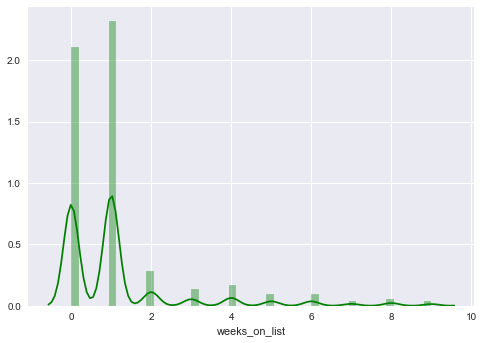

In [52]:
df1 = df_merge.loc[(df_merge['weeks_on_list'] < 10)].copy()
sns.distplot(df1['weeks_on_list'], kde=True, color="green")

In [65]:
df_merge.describe()

,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating,year,log_weeks
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1215.000000,1215.000000,1215.000000,1215.000000
mean,1.360494,2.736626,3751.211523,7941.692181,390.095473,44806.940741,8.466811e+04,3447.869136,3.976741,2014.520988,-inf
std,2.317846,1.164310,11864.112871,24450.464957,1151.049818,91514.465811,1.574557e+05,5754.555105,0.251159,2.126404,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,45.000000,1.770000e+02,2.000000,3.060000,2011.000000,-inf
25%,0.000000,2.000000,21.000000,42.000000,5.000000,7042.000000,1.508450e+04,623.500000,3.820000,2013.000000,-inf
50%,1.000000,3.000000,80.000000,146.000000,18.000000,15924.000000,3.180500e+04,1404.000000,3.990000,2015.000000,0.000000
75%,1.000000,3.000000,676.000000,1446.500000,104.000000,40904.000000,7.837450e+04,3397.500000,4.150000,2016.000000,0.000000
max,16.000000,6.000000,105021.000000,184021.000000,9413.000000,886392.000000,1.398689e+06,47031.000000,4.610000,2018.000000,2.772589
